In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#paths of files to load into dfs
mousepath = 'data/data_mouse_drug_data.csv'
trialpath = 'data/data_clinicaltrial_data.csv'

#import csv's into dfs
mouse = pd.read_csv(mousepath)
clinical = pd.read_csv(trialpath)


In [3]:
#combine dfs
trial = pd.merge(mouse, clinical, on='Mouse ID')
trial.head(1)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0


# Tumor Response to Treatment


In [4]:
#copy trial df into new variable 
response = trial

#drop unnecessary column
response = response.drop('Metastatic Sites', axis=1)

#get the average of the tumor volume grouped by the drug, then timepoint
response = response.groupby(['Drug', 'Timepoint'], as_index=False).mean()
response = pd.DataFrame(response)
response.head(12)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
#get the standard error of tumor volume by drug and timepoint
#copy the df
response_error = trial

#find the standard error of the tumor volume grouped by the drug and timepoint
response_error = response_error.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

#convert into df
response_error = pd.DataFrame(response_error)
response_error.head(14)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053

In [6]:
#code for chart -- remove prior to submitting final product
#response_error.loc['Placebo',]['Tumor Volume (mm3)']

In [7]:
#clean df
response = response.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


**Format Strings**

A format string consists of a part for color, marker and line::

    fmt = '[marker][line][color]'

Each of them is optional. If not provided, the value from the style
cycle is used. Exception: If ``line`` is given, but no ``marker``,
the data will be a line without markers.

Other combinations such as ``[color][marker][line]`` are also
supported, but note that their parsing may be ambiguous.

**Markers**

=============    ===============================
character        description
=============    ===============================
``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker
=============    ===============================

**Line Styles**

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================

Example format strings::

    'b'    # blue markers with default shape
    'or'   # red circles
    '-g'   # green solid line
    '--'   # dashed line with default color
    '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

The supported color abbreviations are the single letter codes

=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================

and the ``'CN'`` colors that index into the default property cycle.

If the color is the only part of the format string, you can
additionally use any  `matplotlib.colors` spec, e.g. full names

# Response to treatment plot

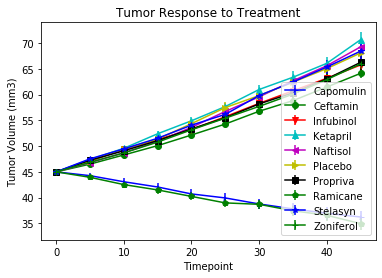

In [8]:
#create list for format of each line
format1 = ["4-b", 'o-g', 'v-r', '^-c', '<-m', '>-y', 's-k', 'p-g', '*-b', '+-g', '_-r']

#for loop that zips the response columns and format together, and creates plot with error bars for each treatment
for x, f in zip(response.columns, format1):
    plt.errorbar(response.index, response[x], response_error.loc[x,]['Tumor Volume (mm3)'],
            label=x, fmt=f)
plt.ylabel('Tumor Volume (mm3)') #chart label
plt.xlabel('Timepoint') #label of x axis
plt.title('Tumor Response to Treatment') #y axis label
plt.legend(loc='best') #place legend in best location
plt.show()

### Response to treatment plots for drugs that decreased tumor volume

In [9]:
#create empty list for formats of lines
format2 = []
#come back to this

# Metastatic Response to Treatment


In [10]:
#copy df
responsem = trial

#drop unnecessary column
responsem = responsem.drop('Tumor Volume (mm3)', axis=1)
#get the average of the number of metastatic sites grouped by the drug, then timepoint
responsem = responsem.groupby(['Drug', 'Timepoint'], as_index=False).mean()
responsem = pd.DataFrame(responsem) #convert groupby into a df
responsem.head(12)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [11]:
#find standard error of the number of metastatic sites 

#copy the df
responsem_error = trial

#find the standard error of the number of metastatic sites grouped by the drug and timepoint
responsem_error = responsem_error.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

#convert into df
responsem_error = pd.DataFrame(responsem_error)
responsem_error.head(14)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625

In [12]:
#clean df
responsem = responsem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
responsem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


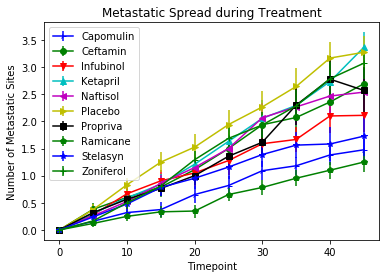

In [13]:
#create list for format of each line
format1 = ["4-b", 'o-g', 'v-r', '^-c', '<-m', '>-y', 's-k', 'p-g', '*-b', '+-g', '_-r']

#for loop that zips the response columns and format together, and creates plot with error bars for each treatment
for x, f in zip(responsem.columns, format1):
    plt.errorbar(responsem.index, responsem[x], responsem_error.loc[x,]['Metastatic Sites'],
            label=x, fmt=f)
plt.ylabel('Number of Metastatic Sites') #chart label
plt.xlabel('Timepoint') #label of x axis
plt.title('Metastatic Spread during Treatment') #y axis label
plt.legend(loc='best') #place legend in best location
plt.show()

# Survival Rates

In [14]:
#copy trial df into new variable 
mice = trial

#drop unnecessary column
mice = mice.drop(['Metastatic Sites', 'Tumor Volume (mm3)'], axis=1)

#get the average of the tumor volume grouped by the drug, then timepoint
mice = mice.groupby(['Drug', 'Timepoint'], as_index=False).count()
mice = pd.DataFrame(mice)
mice.head(1)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25


In [15]:
#clean df
mice = mice.pivot(index="Timepoint", columns="Drug")["Mouse ID"] #uncomment
mice = (mice.divide(mice.iloc[0]))*100 #divide by the number of mice at beginning of experiment, and multiply by 100 to get percentage integer
mice

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


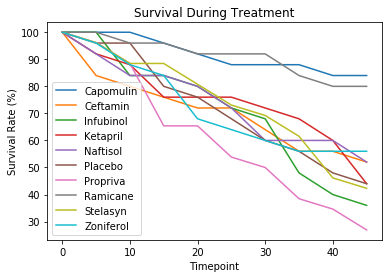

In [16]:
#create list for format of each line
format1 = ["4-b", 'o-g', 'v-r', '^-c', '<-m', '>-y', 's-k', 'p-g', '*-b', '+-g', '_-r']

#for loop that zips the response columns and format together, and creates plot with error bars for each treatment
for x, f in zip(responsem.columns, format1):
    plt.errorbar(mice.index, mice[x], label=x)

plt.ylabel('Survival Rate (%)') #chart label
plt.xlabel('Timepoint') #label of x axis
plt.title('Survival During Treatment') #y axis label
plt.legend(loc='best') #place legend in best location
plt.show()

# Summary Bar Graph

In [17]:
#convert amount of tumor volume to percentage of original tumor volume and multiply by 100 to get percentage integer
response = (response.divide(response.iloc[0]))*100
response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,98.369081,103.340113,104.582225,105.309277,103.991329,104.723532,104.997705,97.655243,105.616559,104.115152
10,95.742868,107.300278,109.786463,110.182820,108.209355,109.829621,109.114535,94.515461,109.919653,108.199737
15,93.476261,111.320122,113.991992,116.444386,113.184485,114.132759,113.482930,92.211246,114.509797,112.842353
20,90.480723,115.904552,118.217091,122.046522,119.209083,120.809816,118.548305,89.418500,120.149766,118.156297
25,88.754506,120.639276,123.811672,128.175515,126.071039,127.739053,123.342528,86.609555,124.813607,123.184300
30,86.154087,126.154483,129.554216,135.543349,132.354463,132.909029,129.325276,86.006972,132.948306,128.252291
35,84.037420,130.727884,134.983247,140.825969,139.300193,138.712478,134.111553,83.226659,138.757110,133.531938
40,82.128891,136.595323,140.361832,146.819067,145.779453,144.561500,140.101193,81.275735,145.236413,139.814871


In [37]:
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
#plt.bar(response.columns, response.tail(1))
response.loc('45')

ValueError: No axis named 45 for object type <class 'type'>